<a href="https://colab.research.google.com/github/teststudent-kb/example_repo/blob/main/12-Geospatial-Data/12.2%20Dot%20Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12.2 Dot Maps

A **dot map** is a way to visualize the locations of events in space. In a dot map, points are added to a map to represent the geographic location of some event.

The most important dot map ever made is perhaps John Snow's map of the cholera cases during the 1854 London cholera outbreak. At the time, the cause of cholera was unknown. Snow's dot map showed that the cholera cases centered around a particular water pump, the Broad Street pump. (In the days before running water, residents had to fetch water from the local water pump.) Snow's dot map is shown below; each "dot" in this map is a thin black box. Snow stacked the boxes when there were multiple people in one residence that contracted cholera. At this resolution, the data appear as black bars of different heights, but if you zoom in, you will see the individual "dots".

![](https://github.com/dlsun/pods/blob/master/12-Geospatial-Data/img/cholera.jpg?raw=1)

Snow followed up on the insight with careful, on-the-ground detective work.

> There were only ten deaths in houses situated decidedly nearer to another street-pump. In five of these cases the families of the deceased persons informed me that they always sent to the pump in Broad Street, as they preferred the water to that of the pumps which were nearer. In three other cases, the deceased were children who went to school near the pump in Broad Street....

In the end, Snow was able to build a strong case that the Broad Street pump was the source of the cholera outbreak.

> The result of the inquiry, then, is, that there was been no particular outbreak or prevalence of cholera in this part of London except among the persons who were in the habit of drinking the water of the above-mentioned pump well. I had an interview with the Board of Guardians of St James's parish, on the evening of [September 7], and represented the above circumstances to them. In consequence of what I said, the handle of the pump was removed on the following day.

Let's make dot maps in Python. We will make a map of all earthquakes in the world on June 4, 2018. First, we read in the data.

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-06-05T17:51:13.660Z,19.407833,-155.282837,1.19,1.88,ml,19.0,82.00,0.009850,0.1300,...,2018-06-05T17:56:55.940Z,"5km WSW of Volcano, Hawaii",earthquake,0.21,0.28,0.250,9.0,automatic,hv,hv
1,2018-06-05T17:46:26.600Z,35.378333,-117.858333,0.21,0.87,ml,10.0,88.00,0.111100,0.1600,...,2018-06-05T17:50:16.233Z,"20km W of Johannesburg, CA",earthquake,0.38,31.61,0.107,13.0,automatic,ci,ci
2,2018-06-05T17:46:24.020Z,38.803665,-122.740837,12.37,0.62,md,10.0,224.00,0.042770,0.1800,...,2018-06-05T17:48:01.126Z,"3km SW of Cobb, CA",earthquake,3.04,6.68,NaN,1.0,automatic,nc,nc
3,2018-06-05T17:34:35.195Z,67.533300,-144.217500,10.30,1.20,ml,NaN,NaN,NaN,0.6800,...,2018-06-05T17:38:03.433Z,"86km SE of Arctic Village, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
4,2018-06-05T17:20:31.020Z,19.324499,-155.251999,3.84,2.64,ml,15.0,113.00,0.047680,0.1000,...,2018-06-05T17:26:16.040Z,"11km S of Volcano, Hawaii",earthquake,0.51,1.87,0.520,3.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,2018-06-04T18:33:13.660Z,44.139333,-110.314333,6.28,0.91,md,10.0,162.00,0.253300,0.2100,...,2018-06-04T20:51:17.600Z,"54km SE of Old Faithful Geyser, Wyoming",earthquake,0.97,3.12,0.115,4.0,reviewed,uu,uu
537,2018-06-04T18:30:13.520Z,19.391666,-155.278503,0.69,1.70,ml,14.0,128.00,0.005883,0.2900,...,2018-06-04T18:36:05.750Z,"6km SW of Volcano, Hawaii",earthquake,0.76,0.49,0.200,4.0,automatic,hv,hv
538,2018-06-04T18:24:37.410Z,-7.055000,123.203900,628.69,5.30,mww,NaN,43.00,1.839000,0.7000,...,2018-06-05T17:40:41.040Z,"165km NNE of Palue, Indonesia",earthquake,9.70,5.20,0.071,19.0,reviewed,us,us
539,2018-06-04T18:20:04.548Z,37.160100,-117.552900,9.60,0.70,ml,13.0,164.33,0.104000,0.1146,...,2018-06-04T18:48:15.218Z,"65km E of Big Pine, California",earthquake,NaN,2.20,0.230,9.0,reviewed,nn,nn


Next, we set up the basic map, just as we did in the previous section. To add the points to the map, we make a scatterplot, just like we learned in Chapter 3, but we have to specify the coordinate system we are using. (Longitude and latitude are not the only way to specify a geographic location.) If the coordinates are specified in longitude and latitude, a good default transform is the `Geodetic`.

In [2]:
# I had to uninstall Shapely to get this to work in Colab.

!pip uninstall -y cartopy
!pip3 install cartopy


Found existing installation: Shapely 1.8.1.post1
Uninstalling Shapely-1.8.1.post1:
  Successfully uninstalled Shapely-1.8.1.post1
ERROR: Could not find a version that satisfies the requirement shapely--no-binary (from versions: none)
ERROR: No matching distribution found for shapely--no-binary
     |████████████████████████████████| 10.8 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 16.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 39.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 31.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 47.2 MB/s 
     |█████████████

In [4]:
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

  Using cached Shapely-1.8.1.post1.tar.gz (198 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.1.post1-cp37-cp37m-linux_x86_64.whl size=665625 sha256=10380f53878869d950ff6b7bd32a22e6066c97202c6e43ccc7365651be6b61c1
  Stored in directory: /root/.cache/pip/wheels/ea/8d/2f/ab748b8a432b3c6cd72e751b3bca17c5a9ed4538b1e78467e6
Successfully built shapely
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


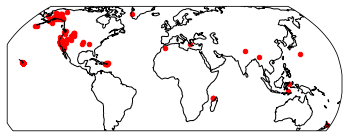

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_quakes = pd.read_csv(data_dir + "earthquakes.csv")
df_quakes

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()



df_quakes.plot.scatter(ax=ax,
                       x="longitude", y="latitude",
                       c="red",
                       transform=ccrs.Geodetic())

Just as before, we can use size to represent another dimension of the data. In the graphic below, we use size to represent the magnitude of each earthquake.

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


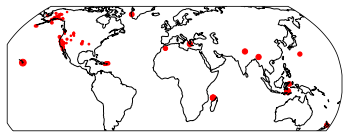

In [9]:
import numpy as np

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

ax.scatter(df_quakes["longitude"], df_quakes["latitude"],
           c="red", s=2 ** df_quakes["mag"],
           transform=ccrs.Geodetic())

# Exercises

1\. The data set (`https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv`) contains data about the number of confirmed cases of the COVID-19 pandemic that shook the world in 2020. Using the location of each case (i.e., latitude and longitude), make a dot map that shows how the cases are distributed geographically.

2\. The file `https://dlsun.github.io/pods/data/ncaa-football-stadiums.csv` contains information about NCAA football stadiums in the United States. Make a dot map that shows the location and capacity of NCAA football stadiums.